### Отчет по лабораторной работе №4 

**по дисциплине: «Машинное обучение»
на тему: «Предварительная обработка данных»
Вариант №5**  
  
**Выполнил: Мосташов В.С. 19-ИВТ-3**  

**Цель работы:** – получение навыков работы с методами регрессии  

**Текст задания:**  
  
1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlotдля признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
6.	Заполните пропущенные значения в данных;
7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйтеперекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказаннымс учётом p-value.

In [118]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import (cross_val_score, StratifiedKFold, train_test_split)
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from scipy.stats import pearsonr, spearmanr

df = pd.read_csv('autos.csv', encoding = 'latin1')
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


**1.Переведенное описание признаков.**

1.  dateCrawled	- даты обхода
2.  name - название автомобиля
3.  seller - продавец(частный диллер)
4.  offerType -тип предложения
5.  price - цена по объявлению о продаже автомобиля
6.  abtest  
7.  vehicleType - тип авто
8.  yearOfRegistration - в каком году автомобиль был впервые зарегистрирован
9.  gearbox - коробка передач
10. powerPS - мощность автомобиля в л.с.
11. model - модель
12. kilometer - сколько километров проехал автомобиль
13. monthOfRegistration - в каком месяце автомобиль был впервые зарегистрирован
14. fuelType - тип топлива
15. brand - марка
16. notRepairedDamage - если у автомобиля повреждения, которые еще не отремонтированы
17. dateCreated - дата создания объявления на ebay
18. nrOfPictures - количество картинок в объявлении (к сожалению, это поле содержит везде 0 и, следовательно, бесполезно (ошибка в обходчике!))
19. postalCode - индекс
20. lastSeenOnline - когда искатель видел это объявление в последний раз в Интернете  

Поля lastSeen и DateCreated можно использовать для оценки того, как долго автомобиль будет находиться, по крайней мере, в сети, прежде чем он будет продан.


**2. Удаление дубликатов строк**

In [119]:
df.shape

(371528, 20)

In [120]:
df = df.drop_duplicates()
df = df.dropna()
df = df.drop(['dateCrawled', 'name', 'offerType', 'model', 'dateCreated', 'lastSeen', 'postalCode'], axis=1)

In [121]:
df.shape

(260952, 13)

**3. Выполните масштабирование количественных признаков**

In [122]:
quantitative = [column for column in df.columns if df[column].dtype.name != 'object']
print(f"Количественые признаки: {quantitative}")
categorial = [column for column in df.columns if df[column].dtype.name == 'object']
print(f"Категориальные признаки: {categorial}")

Количественые признаки: ['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'nrOfPictures']
Категориальные признаки: ['seller', 'abtest', 'vehicleType', 'gearbox', 'fuelType', 'brand', 'notRepairedDamage']


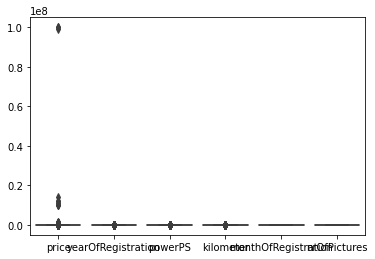

In [123]:
plt.figure()
sns.boxplot(data=df[quantitative])
plt.show()

In [124]:
scaler = MinMaxScaler()
df[quantitative] = scaler.fit_transform(df[quantitative])
df

,seller,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,nrOfPictures
3,privat,0.000015,test,kleinwagen,0.842593,manuell,0.00375,1.000000,0.500000,benzin,volkswagen,nein,0.0
4,privat,0.000036,test,kleinwagen,0.907407,manuell,0.00345,0.586207,0.583333,diesel,skoda,nein,0.0
5,privat,0.000007,test,limousine,0.787037,manuell,0.00510,1.000000,0.833333,benzin,bmw,ja,0.0
6,privat,0.000022,test,cabrio,0.870370,manuell,0.00545,1.000000,0.666667,benzin,peugeot,nein,0.0
7,privat,0.000000,test,limousine,0.648148,manuell,0.00250,0.241379,0.583333,benzin,volkswagen,nein,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371520,privat,0.000032,control,limousine,0.870370,manuell,0.01125,1.000000,0.416667,benzin,seat,ja,0.0
371521,privat,0.000012,control,bus,0.833333,manuell,0.00000,1.000000,0.250000,benzin,opel,nein,0.0
371524,privat,0.000012,test,cabrio,0.833333,automatik,0.00505,0.827586,0.250000,benzin,smart,nein,0.0
371525,privat,0.000092,test,bus,0.796296,manuell,0.00510,1.000000,0.250000,diesel,volkswagen,nein,0.0


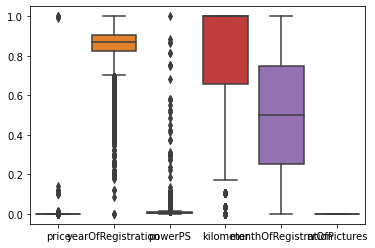

In [125]:
plt.figure()
sns.boxplot(data=df[quantitative])
plt.show()

**4. Замена категориальных признаков**

In [126]:
for i in categorial:
    print(i, ': ', df[i].unique())

seller :  ['privat' 'gewerblich']
abtest :  ['test' 'control']
vehicleType :  ['kleinwagen' 'limousine' 'cabrio' 'kombi' 'suv' 'bus' 'coupe' 'andere']
gearbox :  ['manuell' 'automatik']
fuelType :  ['benzin' 'diesel' 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
brand :  ['volkswagen' 'skoda' 'bmw' 'peugeot' 'mazda' 'nissan' 'renault' 'ford'
 'mercedes_benz' 'seat' 'honda' 'fiat' 'mini' 'opel' 'smart' 'audi'
 'alfa_romeo' 'subaru' 'mitsubishi' 'hyundai' 'volvo' 'lancia' 'porsche'
 'citroen' 'toyota' 'kia' 'chevrolet' 'dacia' 'suzuki' 'daihatsu'
 'chrysler' 'jaguar' 'rover' 'jeep' 'saab' 'daewoo' 'land_rover' 'trabant'
 'lada']
notRepairedDamage :  ['nein' 'ja']


In [127]:
binary = [i for i in categorial if len(df[i].unique()) == 2]
nonbinary = [i for i in categorial if len(df[i].unique()) > 2]

for col in binary:
    for i, unic_item in enumerate(df[col].unique()):
        df[col] = df[col].replace(to_replace=[unic_item], value=[i])
        
df_nonbinary = pd.get_dummies(df[nonbinary])
df.drop(nonbinary, axis=1, inplace=True)
df = pd.concat([df_nonbinary, df], axis=1)
        
df.head()

,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,fuelType_andere,fuelType_benzin,...,seller,price,abtest,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,notRepairedDamage,nrOfPictures
3,0,0,0,0,1,0,0,0,0,1,...,0,0.000015,0,0.842593,0,0.00375,1.000000,0.500000,0,0.0
4,0,0,0,0,1,0,0,0,0,0,...,0,0.000036,0,0.907407,0,0.00345,0.586207,0.583333,0,0.0
5,0,0,0,0,0,0,1,0,0,1,...,0,0.000007,0,0.787037,0,0.00510,1.000000,0.833333,1,0.0
6,0,0,1,0,0,0,0,0,0,1,...,0,0.000022,0,0.870370,0,0.00545,1.000000,0.666667,0,0.0
7,0,0,0,0,0,0,1,0,0,1,...,0,0.000000,0,0.648148,0,0.00250,0.241379,0.583333,0,0.0


**5. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других**

                        vehicleType_andere  vehicleType_bus  \
vehicleType_andere                1.000000        -0.026893   
vehicleType_bus                  -0.026893         1.000000   
vehicleType_cabrio               -0.022873        -0.089969   
vehicleType_coupe                -0.020165        -0.079318   
vehicleType_kleinwagen           -0.044742        -0.175990   
...                                    ...              ...   
gearbox                          -0.026754        -0.046861   
powerPS                          -0.014271        -0.019777   
kilometer                         0.007135         0.031697   
monthOfRegistration              -0.009699         0.014516   
notRepairedDamage                 0.029367        -0.001573   

                        vehicleType_cabrio  vehicleType_coupe  \
vehicleType_andere               -0.022873          -0.020165   
vehicleType_bus                  -0.089969          -0.079318   
vehicleType_cabrio                1.000000      

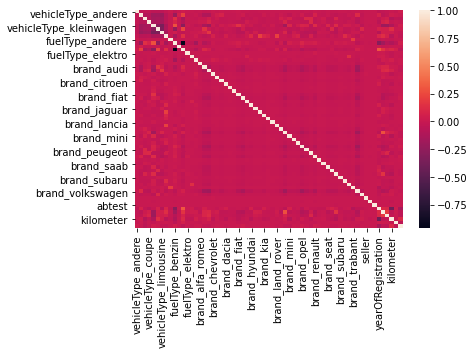

In [128]:
corr_matrix = df.drop(['nrOfPictures'], axis=1).corr()
sns.heatmap(corr_matrix);
print(corr_matrix)

**6.Заполните пропущенные значения в данных**

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260952 entries, 3 to 371527
Data columns (total 64 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   vehicleType_andere      260952 non-null  uint8  
 1   vehicleType_bus         260952 non-null  uint8  
 2   vehicleType_cabrio      260952 non-null  uint8  
 3   vehicleType_coupe       260952 non-null  uint8  
 4   vehicleType_kleinwagen  260952 non-null  uint8  
 5   vehicleType_kombi       260952 non-null  uint8  
 6   vehicleType_limousine   260952 non-null  uint8  
 7   vehicleType_suv         260952 non-null  uint8  
 8   fuelType_andere         260952 non-null  uint8  
 9   fuelType_benzin         260952 non-null  uint8  
 10  fuelType_cng            260952 non-null  uint8  
 11  fuelType_diesel         260952 non-null  uint8  
 12  fuelType_elektro        260952 non-null  uint8  
 13  fuelType_hybrid         260952 non-null  uint8  
 14  fuelType_lpg        

Пропущенных значений нет

**7.Решите поставленную задачу регрессии в соответствии с заданием**

In [130]:
X, y = df.drop(['price'], axis=1), df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [131]:
# линейная регрессия без использования регуляризаторов
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

print(pred[:10] - y_test[:10])

173420   -0.000008
182741   -0.000100
271616   -0.000042
218173    0.000011
361460   -0.000030
45771    -0.000034
297004    0.000044
58119    -0.000009
304305    0.000054
183986   -0.000010
Name: price, dtype: float64


In [132]:
pearson, pvalue = pearsonr(pred, y_test)
print("Корреляция Пирсона: ", pearson)
print("p_value: ", pvalue)
spearman, pvalue = spearmanr(pred, y_test)
print("Корреляция Спирмена: ", spearman)
print("p_value: ", pvalue)

Корреляция Пирсона:  0.014867599365887527
p_value:  3.181590039423053e-05
Корреляция Спирмена:  0.674660771967697
p_value:  0.0


In [133]:
# линейная регрессия, LASSO регуляризатор
reg = linear_model.Lasso(alpha=0.00001)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

print(pred[:10] - y_test[:10])

173420    0.000054
182741   -0.000188
271616    0.000048
218173    0.000051
361460   -0.000095
45771     0.000048
297004    0.000064
58119     0.000037
304305   -0.000003
183986    0.000057
Name: price, dtype: float64


In [134]:
pearson, pvalue = pearsonr(pred, y_test)
print("Корреляция Пирсона: ", pearson)
print("p_value: ", pvalue)
spearman, pvalue = spearmanr(pred, y_test)
print("Корреляция Спирмена: ", spearman)
print("p_value: ", pvalue)

Корреляция Пирсона:  0.005891302082662975
p_value:  0.09928028978102345
Корреляция Спирмена:  0.5117267751970738
p_value:  0.0
